In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

# # from pycaret.time_series import TSForecastingExperiment
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# from sklearn import linear_model
# import pmdarima as pm

global_fig_settings = {
    'renderer': 'png',
    'width': 1000,
    'height': 600,
}

In [8]:
def pred_plot(y_val, pred, date, title):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.grid()
    plt.title(f"{title}", fontsize = 16)
    plt.ylabel('Sales', fontsize = 14)
    plt.xlabel('Date', fontsize = 14)
    plt.show()

In [9]:
data=pd.read_csv('../data/merged.csv')

In [10]:
data

,date,sales,year,month,day,holiday,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,...,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,T,PTY
0,2013-01-01,0.0,2013,1,1,1,False,False,False,False,...,False,False,False,False,False,False,False,True,26.6,0
1,2013-01-01,0.0,2013,1,1,1,False,False,False,False,...,False,False,False,False,False,False,True,False,26.6,0
2,2013-01-01,0.0,2013,1,1,1,False,False,False,False,...,False,False,False,False,False,True,False,False,26.6,0
3,2013-01-01,0.0,2013,1,1,1,False,False,False,False,...,False,False,False,False,True,False,False,False,26.6,0
4,2013-01-01,0.0,2013,1,1,1,False,False,False,False,...,False,False,False,True,False,False,False,False,26.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7123,2013-07-31,0.0,2013,7,31,0,False,False,False,False,...,False,False,False,False,False,False,False,False,24.7,0
7124,2013-07-31,380.0,2013,7,31,0,False,False,False,True,...,False,False,False,False,False,False,False,False,24.7,0
7125,2013-07-31,3.0,2013,7,31,0,False,False,True,False,...,False,False,False,False,False,False,False,False,24.7,0
7126,2013-07-31,2.0,2013,7,31,0,True,False,False,False,...,False,False,False,False,False,False,False,False,24.7,0


In [11]:
df1 = data.set_index('date')
x = df1.drop(['sales'], axis = 1)
y = df1['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = False, random_state = 1)
print(x_train.shape, x_test.shape)

(5702, 39) (1426, 39)


In [12]:
RF  = RandomForestRegressor(random_state = 42)

param = {'max_depth': range(1, 51)}

model = RandomizedSearchCV(RF,     #기본 모델
                          param,   #파라미터 범위
                          cv = 5,  # K-Fold 개수
                          n_iter = 20, # 선택할 잉의 파라미터 개수
                          scoring = 'r2')

In [13]:
model.fit(x_train, y_train)

# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)



[0.85209125 0.85110724 0.85206664 0.85292696 0.85378054 0.85245277
 0.85176416 0.85202168 0.85236286 0.85181432 0.85195709 0.85199233
 0.79792145 0.85144351 0.85228241 0.84911363 0.85474612 0.85206664
 0.85273375 0.85075547]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 9}
--------------------------------------------------------------------------------
최고성능: 0.8547461190050237


In [14]:
MAE={}
MAPE={}

RF = RandomForestRegressor(max_depth = 5, n_estimators=200, random_state= 42)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print("r2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred) )

MAE['RF'] = mean_absolute_error(y_test, y_pred)
MAPE['RF'] = mean_absolute_percentage_error(y_test, y_pred)

r2:  0.880590017470809
MAE:  63.49024147776529
MAPE:  5.207206067164725e+16


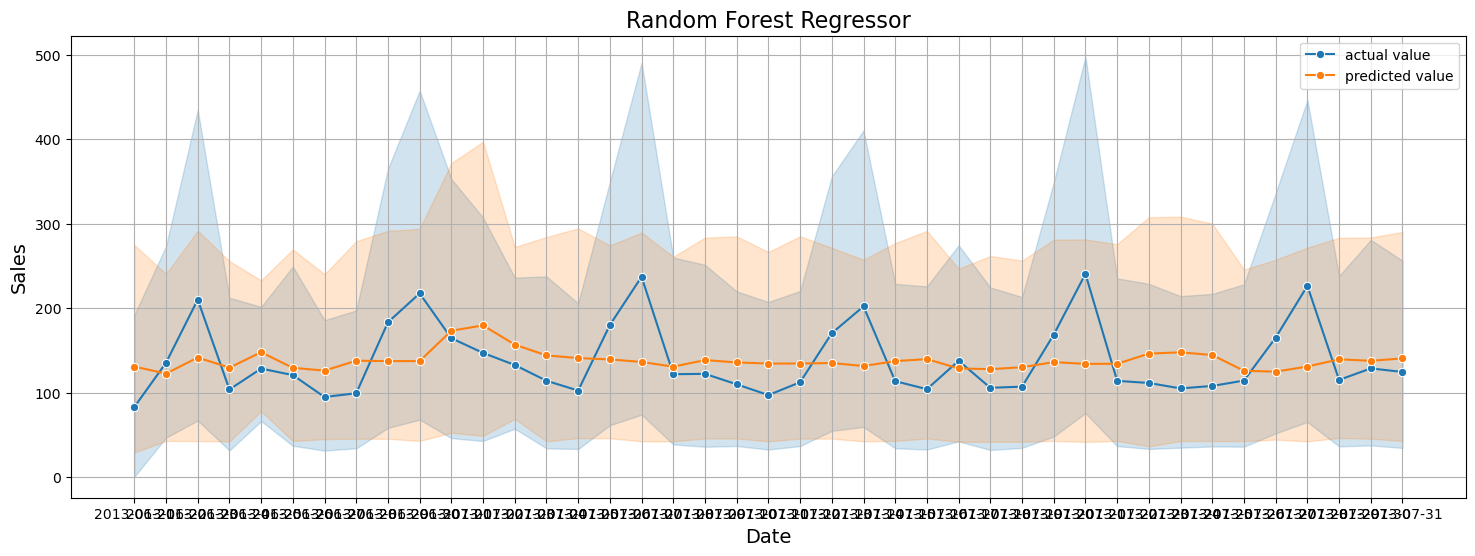

In [15]:
pred_plot(y_test, y_pred, pd.Series(y_test.index), "Random Forest Regressor")

In [22]:
LGBM = LGBMRegressor(random_state = 42, verbose = -1)

# 파라미터 선언
  # max_depth: 1~50
param = {'max_depth': range(1, 51)} # 1 ~ 50

# Random Search 선언
  # cv=5
  # n_iter=20
  # scoring='r2'
model = RandomizedSearchCV(LGBM,     #기본 모델
                          param,   #파라미터 범위
                          cv = 5,  # K-Fold 개수
                          n_iter = 20, # 선택할 잉의 파라미터 개수
                          scoring = 'r2') # 평가 방법 - 얘는 클수록 좋은 것으로 안다. 그래서 MAE를 쓰려면 neg_mean...으로 써야한다.

In [23]:
model.fit(x_train, y_train, error_score='raise')

# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dntjq\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'error_score'
